In [3]:
import numpy as np #math
import matplotlib.pyplot as plt #graphs and plots
import pandas as pd #Data manipulation
import seaborn as sns #Visualization
%matplotlib inline 
import gmplot
#Includes the plot inside the notebook
#% Makes it a proxy for a commmandline
#sns.set(color_codes = True)

In [4]:
#Loading data into the workbook
pd.set_option('display.max_rows', None)
df = pd.read_csv('/Users/MACOS/Downloads/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')


In [5]:
#I. EDA
#I.1. Display the top and bottom observations
dfhead = df.head()
dftail = df.tail(10)
print(dfhead)

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/22/20  4/23/20  4/24/20  4/25/20  \
0        0        0        0  ...     1176     1279     1351     1463   
1        0        0        0  ...      634      663      678      712   
2        0        0        0  ...     2910     3007     3127     3256   
3        0        0        0  ...      723      723      731      738   
4        0        0        0  ...       25       25       25       25   

   4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  
0     1531     1703    

In [6]:
#I.2. Check the data types
dftype = df.dtypes
print(dftype)

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
2/17/20             int64
2/18/20             int64
2/19/20             int64
2/20/20             int64
2/21/20             int64
2/22/20             int64
2/23/20             int64
2/24/20             int64
2/25/20     

In [7]:
#I.3. Cleaning the data
#df = df.drop(['SNo', 'Last Update'], axis=1)

In [9]:
#I.4. Cleaning the data
#a. Dropping Duplicates
duplicaterows = df[df.duplicated()]
print(duplicaterows.shape)
if duplicaterows.shape[0]==0:
    print("There is no duplicate rows")
else:
    df = df.drop_duplicates()
#b. Dropping missing values
print(df.isnull().sum())
#num_missing = (df['Confirmed'] == 0).sum()
#dataset.fillna(dataset.mean(), inplace=True)
# df = df.dropna() # Dropping NA values
#c. Replacing missing values with the mean of the rest

(0, 105)
There is no duplicate rows
Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
2/17/20             0
2/18/20             0
2/19/20             0
2/20/20             0
2/21/20             0
2/22/20             0
2/23/20             0
2/24/20             0
2/25/20             0
2/26/20             0
2/27/20             0
2/28/20             0
2/29/20             0
3/1/20            

In [10]:
#I.5 Detecting outliers
#sns.boxplot(x=df[['ObservationDate', 'Country/Region', 'Confirmed','Deaths']])
#Quantiles
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 — Q1
#print(IQR)

In [11]:
#I.6 Modifying - Add variables
Province_State = list()
for i in range(len(df)):
    if (df['Province/State'][i] is np.nan):
        Province_State.append(df['Country/Region'][i])
    else:
        Province_State.append(str(df['Province/State'][i]) + ' - ' + str(df['Country/Region'][i]))
#print(Province_State)
df = df.drop(['Province/State'], axis=1)
df['Area'] = Province_State
#print(df.head())

1
[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 8, 8, 8, 10, 10, 13, 13, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 30, 30, 31, 38, 39, 47, 53, 56, 61, 66, 75, 85, 91, 94, 113, 123, 134, 141, 153, 163, 174, 188, 203, 212, 218, 233, 237, 240, 241, 245, 249, 251, 255, 257, 258, 262, 265, 266, 267, 268, 268, 268, 268, 268, 268, 268, 268, 270, 270, 270, 270, 270, 270, 270, 270]


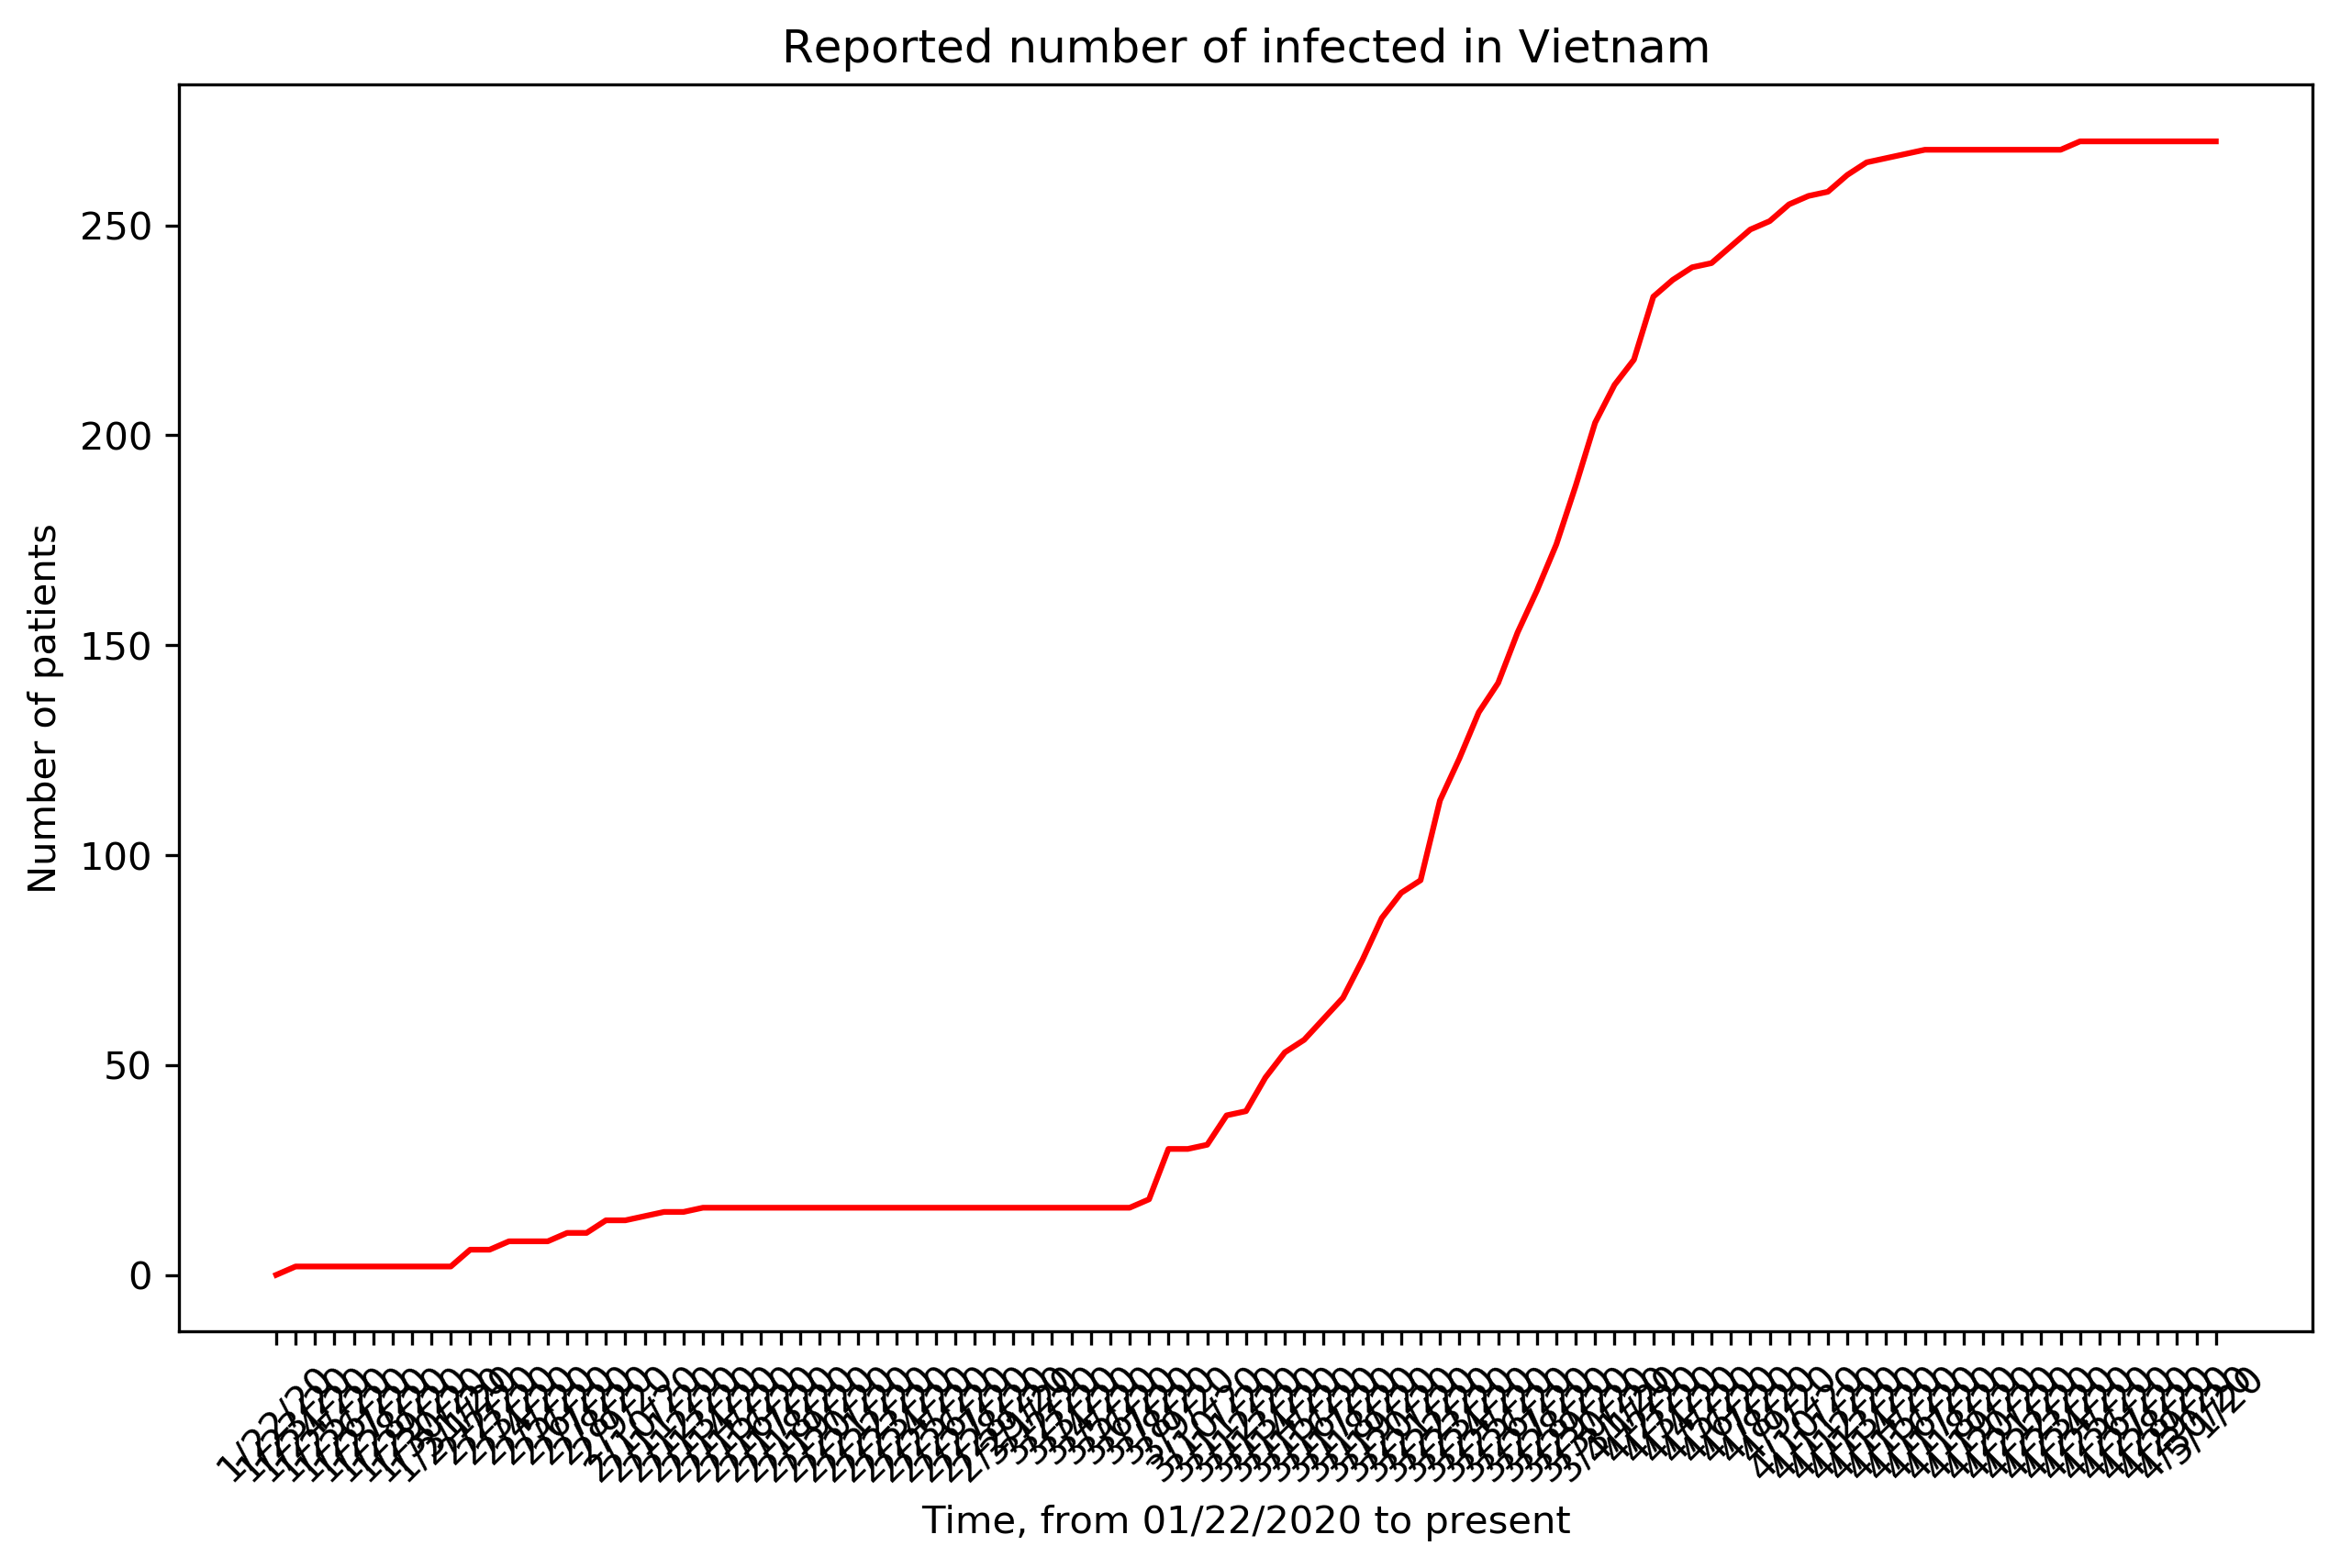

In [41]:
#import plotly.io as pio
#I.6. Visualization
#a. Line graphs of every place recorded
Place = 'Vietnam' #Modify this string to change the 
DateofPlace = list()
Series = list()

index = 0
for i in range(df.shape[0]):
    if(df['Area'][i] == Place):
        index = i #Locating the row where the place is in the df
        break

for col in df.columns:
    DateofPlace.append(col)
DateofPlace = DateofPlace[3:]  
DateofPlace = DateofPlace[:-1]    
#print(DateofPlace)

for col in df.columns:
    Series.append(df[col][index])
Series = Series[3:]  
Series = Series[:-1]     
#print(Series)

numberofzeroes = 0
for i in Series:
    if(i == 0):
        numberofzeroes += 1
print(numberofzeroes)

Series = Series[(numberofzeroes-1):]
DateofPlace = DateofPlace[(numberofzeroes-1):]  
print(Series)


#Ploting these line against time
fig = plt.figure(figsize = (10,6), dpi = 300)
plt.plot(DateofPlace, Series, color = 'r')
#plt.plot(DateofPlace, DeathsatPlace, color = 'b')
#plt.plot(DateofPlace, RecoveredsatPlace, color = 'g')
plt.xlabel('Time, from 01/22/2020 to present')
plt.xticks(rotation=45)
plt.ylabel('Number of patients')
plt.title('Reported number of infected in ' + Place)
plt.show()
fig.savefig(Place + ".png", dpi = 300) #save figure

In [14]:
#I.6. Graphs 
#a. Histogram
#df.Deaths.value_counts().plot(kind='bar', figsize=(10,5))
#plt.title(“Number of cars by make”)
#plt.ylabel(‘Number of cars’)
#plt.xlabel(‘Make’);

#b. Scatter plot
#fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(df[‘HP’], df[‘Price’])
#ax.set_xlabel(‘HP’)
#ax.set_ylabel(‘Price’)
#plt.show()

#c. Heat Map
#plt.figure(figsize=(20,10))
#c= df.corr()
#sns.heatmap(c,cmap=”BrBG”,annot=True)
#c

In [34]:
#b. Bar charts of countries
#Get the list of countries repeated
#Cleaning data for the histogram
RepeatedCountries = list()
temp = ''
RepeatedList = list()
RepeatedCountries.append(temp)
for i in range(df.shape[0]):
    if ((df['Country/Region'][i] == temp) and (i>1) 
       and (df['Country/Region'][i] != RepeatedCountries[-1]) ):
        RepeatedCountries.append(df['Country/Region'][i])
    temp = df['Country/Region'][i]
RepeatedCountries = RepeatedCountries[1:-2]
print(RepeatedCountries)

#Australia has no summation of indivdual place
RepeatedAustralia = list(0 for i in range(101))
#Find the first observation position of Australia
for i in range(df.shape[0]):
    if (df['Country/Region'][i] == 'Australia'):
        for col in df.columns[3:-1]:
            RepeatedAustralia[df.columns.get_loc(col)-3] += df[col][i]
RepeatedAustralia.insert(0, 'Australia')
#print(RepeatedAustralia)
RepeatedList.append(RepeatedAustralia)

#Canada has no summation of indivdual place
RepeatedCanada = list(0 for i in range(101))
#Find the first observation position of Canada
for i in range(df.shape[0]):
    if (df['Country/Region'][i] == 'Canada'):
        for col in df.columns[3:-1]:
            RepeatedCanada[df.columns.get_loc(col)-3] += df[col][i]

RepeatedCanada.insert(0, 'Canada')
#print(RepeatedCanada)
RepeatedList.append(RepeatedCanada)

#China has no summation of indivdual place
RepeatedChina = list(0 for i in range(101))
#Find the first observation position of China
for i in range(df.shape[0]):
    if (df['Country/Region'][i] == 'China'):
        for col in df.columns[3:-1]:
            RepeatedChina[df.columns.get_loc(col)-3] += df[col][i]
RepeatedChina.insert(0,'China')
#print(RepeatedChina)
RepeatedList.append(RepeatedChina)

#Denmark has no summation of indivdual place
RepeatedDenmark = list(0 for i in range(101))
#Find the first observation position of Denmark
for i in range(df.shape[0]):
    if (df['Country/Region'][i] == 'Denmark'):
        for col in df.columns[3:-1]:
            RepeatedDenmark[df.columns.get_loc(col)-3] += df[col][i]
RepeatedDenmark.insert(0, 'Denmark')
#print(RepeatedDenmark)
RepeatedList.append(RepeatedDenmark)

RepeatedFrance = list(0 for i in range(101))
#Find the first observation position of France
for i in range(df.shape[0]):
    if (df['Country/Region'][i] == 'France'):
        for col in df.columns[3:-1]:
            RepeatedFrance[df.columns.get_loc(col)-3] += df[col][i]

RepeatedFrance.insert(0, 'France')
#print(RepeatedFrance)
RepeatedList.append(RepeatedFrance)

RepeatedNetherlands = list(0 for i in range(101))
#Find the first observation position of Netherlands
for i in range(df.shape[0]):
    if (df['Country/Region'][i] == 'Netherlands'):
        for col in df.columns[3:-1]:
            RepeatedNetherlands[df.columns.get_loc(col)-3] += df[col][i]
RepeatedNetherlands.insert(0, 'Netherlands')
#print(RepeatedNetherlands)
RepeatedList.append(RepeatedNetherlands)

RepeatedUK = list(0 for i in range(101))
#Find the first observation position of UK
for i in range(df.shape[0]):
    if (df['Country/Region'][i] == 'United Kingdom'):
        for col in df.columns[3:-1]:
            RepeatedUK[df.columns.get_loc(col)-3] += df[col][i]
RepeatedUK.insert(0, 'UK')
#print(RepeatedUK)
RepeatedList.append(RepeatedUK)


['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands', 'United Kingdom']


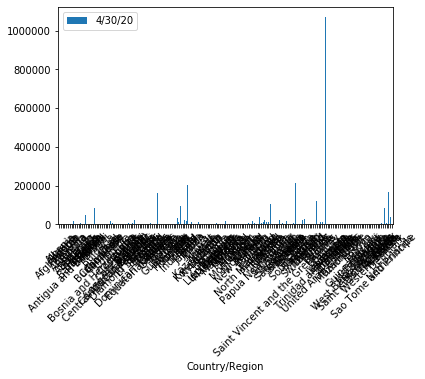

In [46]:
#Creating a new dataframe for histogram

df1 = df.drop(['Area', 'Lat', 'Long'], axis=1)
for name in RepeatedCountries:
    df1 = df1[df1['Country/Region'] != name]

for a in RepeatedList:
    a_series = pd.Series(a, index = df1.columns)
    df1 = df1.append(a_series, ignore_index = True)
#print(df1)

#Bar plot
df1.plot.bar(x = "Country/Region", y = "4/30/20", rot = 45)


In [51]:
#from mpl_toolkits.basemap import Basemap

#plt.figure(8,8)
#m = Basemap(projection = 'ortho', resolution = None, lat_0 = 50, lon_0 = -100)
#m.bluemarble(scale = 0.5)



KeyError: 'PROJ_LIB'